In [8]:
!pip install cudf

Using legacy setup.py install for cudf, since package 'wheel' is not installed.
    Running setup.py install for cudf: started
    Running setup.py install for cudf: finished with status 'error'


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\pc05\pycharmprojects\etc\venv\scripts\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\PC05\\AppData\\Local\\Temp\\pip-install-ggceve63\\cudf\\setup.py'"'"'; __file__='"'"'C:\\Users\\PC05\\AppData\\Local\\Temp\\pip-install-ggceve63\\cudf\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\PC05\AppData\Local\Temp\pip-record-ixy2x17i\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\pc05\pycharmprojects\etc\venv\include\site\python3.7\cudf'
         cwd: C:\Users\PC05\AppData\Local\Temp\pip-install-ggceve63\cudf\
    Complete output (16 lines):
    running install
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\PC05\AppData\Local\Temp\

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.api import tsa
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import gc

In [16]:
df = pd.read_csv('./01F0467N01F0413N.csv',index_col='Date',encoding = 'big5')
df = df.drop(['Hours'], axis=1)
df['Traffic'] = df['Traffic'].astype('float64')

In [17]:
training = pd.DataFrame(df['Traffic'][1:7296])
testing = pd.DataFrame(df['Traffic'][7296:])

# scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(training)
# train_scaled = scaler.transform(training)
# test_scaled = scaler.transform(testing)
# training = pd.DataFrame(train_scaled)
training = pd.Series(training['Traffic'].values)
# testing = pd.DataFrame(test_scaled)
testing = pd.Series(testing['Traffic'].values)



# z = preprocessing.scale(training)
# # pd.Series(z.tolist())
# # training = pd.Series(z.tolist())
# z = preprocessing.scale(testing)
# testing = pd.Series(z.tolist())

# print(training.ndim)
# print(training.shape)
# print(training.dtypes)
training

0       107867.0
1       106722.0
2       110665.0
3       120835.0
4       135657.0
          ...   
7290    201351.0
7291    208029.0
7292    212500.0
7293    213017.0
7294    213135.0
Length: 7295, dtype: float64

c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


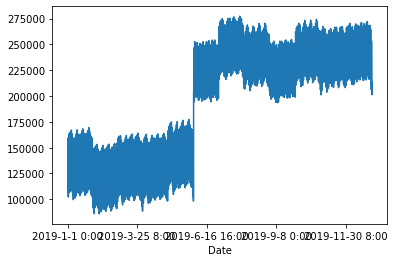

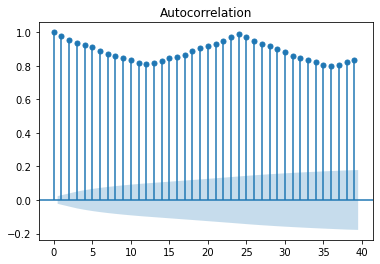

In [34]:
# plt.plot(df.index, df['Traffic'])
# plt.title('Traffic')
# plt.xlabel('Date')
# plt.grid(True)
# plt.show()
df['Traffic'].plot()
# plt.show()
plot_acf(training).show()

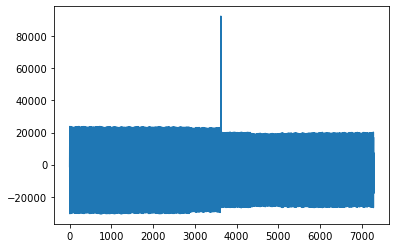

In [19]:
training_diff = training.diff(periods = 1)
# 差分後需要排空，
training_diff = training_diff.dropna()
training_diff.plot()
plt.show()

# df3 = training_diff.diff(periods = 2)
# df3 = df3.dropna()
# df3.plot()
# plt.show()

# df4 = train_scaled.diff(periods = 3)
# df4 = df4.dropna()
# df4.plot()
# plt.show()
# # training_diff

# test_stationarity.testStationarity(df4)

c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


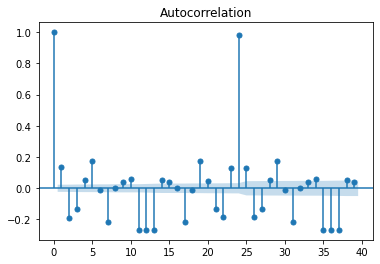

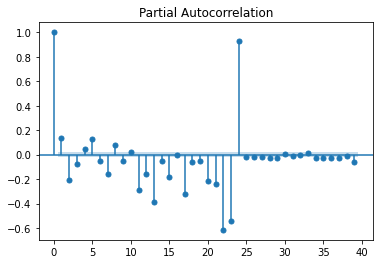

In [20]:
plot_acf(training_diff).show()
plot_pacf(training_diff).show()
# plot_acf(df3).show()
# plot_pacf(df3).show()
# plot_acf(df4).show()
# plot_pacf(df4).show()

In [7]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(training, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=24,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

# # Forecast
# n_periods = 24
# fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = np.arange(len(training), len(training)+n_periods)

# # make series for plotting purpose
# fc_series = pd.Series(fc, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# plt.plot(df.value)
# plt.plot(fc_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("Final Forecast of WWW Usage")
# plt.show()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,0,1,24) [intercept=True]; AIC=148457.989, BIC=148492.463, Time=32.274 seconds
Fit ARIMA(0,0,0)x(0,0,0,24) [intercept=True]; AIC=180178.725, BIC=180192.515, Time=0.078 seconds
Fit ARIMA(1,0,0)x(1,0,0,24) [intercept=True]; AIC=133912.470, BIC=133940.050, Time=55.684 seconds
Near non-invertible roots for order (1, 0, 0)(1, 0, 0, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,0,1)x(0,0,1,24) [intercept=True]; AIC=166682.384, BIC=166709.964, Time=25.075 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,0,0,24) [intercept=False]; AIC=197978.665, BIC=197985.560, Time=0.038 seconds
Fit ARIMA(1,0,1)x(0,0,0,24) [intercept=True]; AIC=156225.416, BIC=156252.996, Time=0.449 seconds
Fit ARIMA(1,0,1)x(1,0,1,24) [intercept=True]; AIC=139

KeyboardInterrupt: 

c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7295
Model:                     ARMA(7, 3)   Log Likelihood              -76829.910
Method:                       css-mle   S.D. of innovations           9065.561
Date:                Tue, 04 Aug 2020   AIC                         153683.820
Time:                        11:43:48   BIC                         153766.560
Sample:                             0   HQIC                        153712.272
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.807e+05    1.9e+04      9.497      0.000    1.43e+05    2.18e+05
ar.L1.y        2.5168        nan        nan        nan         nan         nan
ar.L2.y       -3.0980      0.000  -1.28e+04      0.0

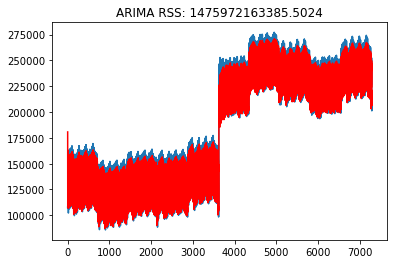

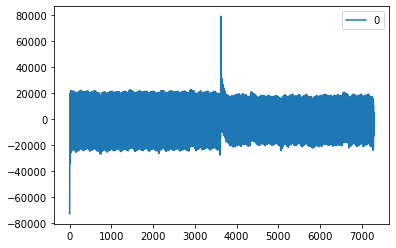

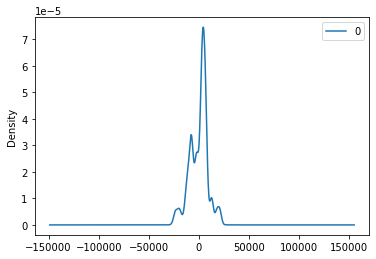

                  0
count   7295.000000
mean     166.538170
std     9108.033792
min   -72873.445428
25%    -6722.048456
50%     2556.469307
75%     5594.193196
max    79091.966218


In [46]:
arima = ARIMA((training), order=(7, 0, 3))#p,d,q
result = arima.fit(disp=-1)
print(result.summary())
plt.plot(training)
plt.plot(result.fittedvalues, color='red')

# training_diff=training_diff.reshape(780,1)
# training_diff = pd.DataFrame.transpose(training_diff)
# print(training_diff)
plt.title('ARIMA RSS: %.4f' % sum(result.fittedvalues - training) ** 2)
plt.show()
# plot residual errors
residuals = pd.DataFrame(result.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
test_list=[]
predict_list=[]

history = [x for x in training]
predictions = list()
for t in range(len(testing)):
    model = ARIMA(history, order=(7,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = testing[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
#     if t%100==0:print(t)
# predicted_descaled = scaler.inverse_transform(predictions)
# test = np.array(testing[0:24])
# test = np.reshape(test, (-1, 1))
# test_descaled = scaler.inverse_transform(test)
# error = mean_squared_error(testing[1:24], predictions)
print('Test MSE: %.3f' % error)
# print(predicted_descaled,test_descaled)
# plot
ts = testing.shift(1)

ts = ts.drop(index = 0)
del predictions[0]

plt.plot(ts)
plt.plot(predictions, color='red')
plt.show()

c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum 

c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum 

c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood 

c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\pc05\pycharmprojects\etc\venv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum 

In [ ]:

error = mean_squared_error(ts, predictions)
# type(error)

print('Test MSE: %.3f' % (error/1463))

predict_list = []
test_list = []

for n1 in predictions:
    predict_list.append(n1[0])
for n11 in ts:
    test_list.append(n11)


dict_={
    "Predicted":predict_list,
    "Answer":test_list,
}

df = pd.DataFrame(dict_)
df["error(%)"] = ((df["Predicted"]-df["Answer"] )/ df["預測"]) * 100
df

                  預測             答案        誤差(%)
count    1463.000000    1463.000000  1463.000000
mean   235603.683919  236485.144908    -0.368886
std     16977.211508   17392.839019     1.136752
min    202930.161790  201340.000000    -4.189818
25%    221034.435303  221456.000000    -0.805865
50%    230851.869349  233448.000000    -0.344114
75%    251232.296877  251597.500000     0.099493
max    271016.326326  272229.000000     1.959212


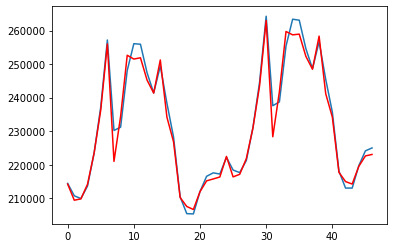

In [430]:
print(df.describe())
plt.plot(testing[0:47])
plt.plot(predictions[0:47], color='red')
plt.show()

In [ ]:
gc.collect()